# Imports and Data Preprocessing

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

# Chert 
exp_1 = pd.read_excel("EXP-00001-Master.xlsx")
exp_2 = pd.read_excel('EXP-00002-Master.xlsx')
exp_3 = pd.read_excel('EXP-00003-Master.xlsx')

# Obsidian 
exp_4 = pd.read_excel('EXP-00004-Master.xlsx')
exp_5 = pd.read_excel('EXP-00005-Master.xlsx')


exp_1.drop(index=0, inplace=True)
exp_2.drop(index=0, inplace=True)
exp_3.drop(index=0, inplace=True)
exp_4.drop(index = 0, inplace = True)
exp_5.drop(index = 0, inplace= True)

exp_1.reset_index(drop=True, inplace=True)
exp_2.reset_index(drop=True, inplace=True)
exp_3.reset_index(drop=True, inplace=True)
exp_4.reset_index(drop=True, inplace=True)
exp_5.reset_index(drop=True, inplace=True)

In [103]:
# all filter values are the same, so they get the ax, same with hash
filters = ['Filter0', 'Filter1', 'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash']

In [104]:
# Obsidian 
O_not_included = ['Id', 'Filter0','Filter1', 'Filter2','Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash', 'Img Id']
O_filtered = [x for x in exp_4.columns if x not in O_not_included]

# Chert
C_not_included = ['Id', 'Filter0','Filter1', 'Filter2','Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash', 'Img Id', 'Curvature', 'Transparency', 'Angularity']
C_filtered = [x for x in exp_1.columns if x not in C_not_included]

# Chert Filtered 
exp_1_filtered = exp_1[C_filtered]
exp_2_filtered = exp_2[C_filtered]
exp_3_filtered = exp_3[C_filtered]

# Obsidian filtered
exp_4_filtered = exp_4[O_filtered]
exp_5_filtered = exp_5[O_filtered]


# Setting production stage values
# Chert
exp_1_filtered['Production Stage'] = 0
exp_2_filtered['Production Stage'] = 1
exp_3_filtered['Production Stage'] = 2

# Obsidian
exp_4_filtered['Production Stage'] = 3
exp_5_filtered['Production Stage'] = 4

# Merging Chert Data
C_data = exp_1_filtered.merge(exp_2_filtered, how= 'outer')
C_data = C_data.merge(exp_3_filtered, how = 'outer')

# Merging Obsidian Data
O_data = exp_4_filtered.merge(exp_5_filtered, how = 'outer')

C:\Users\18595\AppData\Local\Temp\ipykernel_18472\1242546108.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_1_filtered['Production Stage'] = 0
C:\Users\18595\AppData\Local\Temp\ipykernel_18472\1242546108.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_2_filtered['Production Stage'] = 1
C:\Users\18595\AppData\Local\Temp\ipykernel_18472\1242546108.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Data Visualization

<AxesSubplot:>

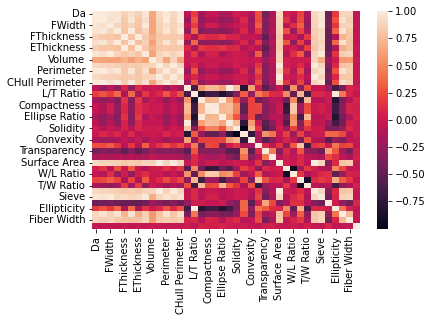

In [110]:
import seaborn as sns

sns.heatmap(O_data.corr())

# Obsidian Test Train Split

In [76]:
# Obsidian test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    O_data[O_filtered],
    O_data['Production Stage'],
    test_size=0.1,
    stratify= O_data['Production Stage'],
    random_state=44)


In [80]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

# Obsidian Model

In [91]:
# Obsidian Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

O_model = KNeighborsClassifier(n_neighbors=5,
                            weights= 'distance', 
                            p = 1, 
                            leaf_size= 5, 
                            algorithm='auto')
O_model.fit(O_data[O_filtered], O_data["Production Stage"])
labels = O_data['Production Stage']

random = O_data.sample(frac = 1)

one_hundred = random[:10000]

O_predictions = O_model.predict(X_test)

print('Accuracy score:',accuracy_score(y_test, O_predictions))

# Accuracy score: 0.7260606060606061


c:\Users\18595\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy score: 0.7373737373737373


# Chirt Test Train Split

In [83]:
# Chirt test train split
from sklearn.model_selection import train_test_split

CX_train, CX_test, cy_train, cy_test = train_test_split(
    C_data[C_filtered],
    C_data['Production Stage'],
    test_size=0.1,
    stratify= C_data['Production Stage'],
    random_state=44)


In [84]:
sc_CX = StandardScaler()
C_train = sc_CX.fit_transform(CX_train)
CX_test= sc_CX.transform(CX_test)

In [92]:
# Chert Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

C_model = KNeighborsClassifier(n_neighbors=5, 
                            weights= 'distance',
                            p = 1, leaf_size= 5, 
                            algorithm='auto')

C_model.fit(C_data[C_filtered], C_data["Production Stage"])
labels = C_data['Production Stage']

random = C_data.sample(frac = 1)

one_hundred = random[:10000]

C_predictions = C_model.predict(CX_test)

print('Accuracy score:',accuracy_score(cy_test, C_predictions))

# Accuracy score: 0.4437566324725858

c:\Users\18595\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy score: 0.4396887159533074


In [87]:
# Obsidian Grid search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = [{ 
    'weights' : ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5,10,15,20,25,30,35,40],
            }]

search = GridSearchCV(O_model, 
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 5)

search.fit(X_train,y_train)
print(search.best_params_)
print("score: {}".format(search.score(X_train, y_train)))

{'algorithm': 'auto', 'leaf_size': 5, 'weights': 'distance'}
score: 1.0


In [93]:
# Chirt Grid search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = [{ 
    'weights' : ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5,10,15,20,25,30,35,40],
            }]

search = GridSearchCV(C_model, 
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 5)

search.fit(CX_train,cy_train)
print(search.best_params_)
print("score: {}".format(search.score(CX_train, cy_train)))

KeyboardInterrupt: 